In [599]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [468]:
need_cols = ["cowcode","year", "ager", "agexp", "anoc", "army85", 
           "autch98", "auto4", "autonomy", "avgnabo",
           "centpol3", "coldwar", "decade1", "decade2", 
           "decade3", "decade4", "dem", "dem4",
           "demch98", "dlang", "drace", "drel", 
           "durable", "ef", "ef2", "ehet", 
           "elfo", "elfo2", "etdo4590", "expgdp", 
           "exrec", "fedpol3", "fuelexp", "gdpgrowth", 
           "geo1", "geo2", "geo34", "geo57",
           "geo69", "geo8", "illiteracy", "incumb", 
           "infant", "inst", "inst3", "life",
           "lmtnest", "major", "manuexp", "milper",
           "mirps0", "mirps1", "mirps2", "mirps3", 
           "nat_war", "ncontig", "nmgdp", "nmdp4_alt",
           "numlang", "nwstate", "oil", "p4mchg", 
           "parcomp", "parreg", "part", "partfree", 
           "plural", "plurrel", "pol4", "pol4m", 
           "pol4sq", "polch98", "polcomp", "popdense", 
           "presi", "pri", "proxregc", "reg", 
           "regd4_alt", "relfrac", "seceduc", "second",
           "semipol3", "sip2", "sxpnew", "sxpsq",
           "tnatwar", "trade", "warhist", "xconst", 'warstds']

In [469]:
seed = 20201106 # the deadline date

In [470]:
# Load raw data 
df = pd.read_csv('data/SambnisImp.csv', usecols = need_cols )

# Print dimension information about the dataset
print(f'Raw data dimensions: {df.shape}')

# Print first 5 columns
df.head()

Raw data dimensions: (7140, 91)


,cowcode,year,warstds,autonomy,popdense,army85,milper,trade,nmgdp,autch98,...,mirps1,mirps2,mirps3,sxpsq,pol4sq,decade1,decade2,decade3,decade4,proxregc
0,700,1945,0,0.005151,118.554791,129472.9042,121.087366,72.881375,4508.131692,0,...,0.16935,0.313143,0.373714,0.052989,61.493014,0,0,0,0,0.143299
1,700,1946,0,0.000000,117.756342,129413.0225,121.885359,72.900089,4491.340308,0,...,0.00000,1.000000,0.000000,0.052663,100.000000,0,0,0,0,1.000000
2,700,1947,0,0.000000,118.280656,130431.0145,122.780608,72.962880,4484.267686,0,...,0.00000,1.000000,0.000000,0.052891,100.000000,0,0,0,0,1.000000
3,700,1948,0,0.000000,118.325869,126781.6866,118.256427,73.102449,4474.082672,0,...,0.00000,1.000000,0.000000,0.052902,100.000000,0,0,0,0,1.000000
4,700,1949,0,0.000000,118.312296,130979.2470,122.245074,72.850389,4497.299503,0,...,0.00000,1.000000,0.000000,0.052706,100.000000,0,0,0,0,1.000000


In [471]:
df["year"] = pd.to_datetime(df["year"], format="%Y")
df = df.set_index(['cowcode', 'year'])

In [547]:
serial_len = 10
X = []
y = []
for name, group in df.groupby(level='cowcode'):
    group = group.reset_index(level='cowcode', drop=True)
    for i in range(len(group)-serial_len-1):
        y.append((group.iloc[i+serial_len+1,:])["warstds"])
        X.append(group.iloc[i:i+serial_len].drop("warstds", axis=1).values)
print(np.shape(X), np.shape(y))

(5219, 10, 88) (5219,)


In [548]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)

In [549]:
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(3653, 10, 88) (1566, 10, 88) (3653,) (1566,)


In [550]:
scalers = {}
X_trainsc = np.zeros_like(X_train)
X_testsc = np.zeros_like(X_test)
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler()
    X_trainsc[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 

for i in range(X_test.shape[1]):
    X_testsc[:, i, :] = scalers[i].transform(X_test[:, i, :]) 

In [551]:
print(np.unique(y_train,return_counts=True))

(array([0., 1.]), array([3611,   42], dtype=int64))


# LSTM

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 100)               75600     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 101       
Total params: 75,701
Trainable params: 75,701
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
4/4 - 1s - loss: 0.4486 - val_loss: 0.1230
Epoch 2/30
4/4 - 0s - loss: 0.3793 - val_loss: 0.1043
Epoch 3/30
4/4 - 0s - loss: 0.3634 - val_loss: 0.1287
Epoch 4/30
4/4 - 0s - loss: 0.3391 - val_loss: 0.1676
Epoch 5/30
4/4 - 0s - loss: 0.3367 - val_loss: 0.1757
Epoch 6/30
4/4 - 0s - loss: 0.3279 - val_loss: 0.1498
Epoch 7/30
4/4 - 0s - loss: 0.3157 - val_loss: 0.1280
Epoch 8/30
4/4 - 0s - loss: 0.3089 - val_loss: 0.1282
Epoch 9/30
4/4 - 0s - loss: 0.2984 - val_loss: 0.1461
Epoch 10/30
4/4 - 0s

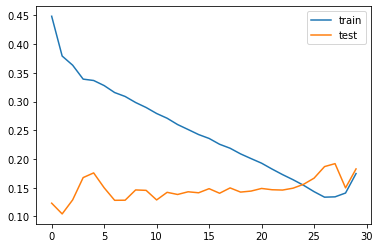

In [593]:
weights = {0:1,1:10}

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(X_trainsc.shape[1], X_trainsc.shape[2])))
#model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())
# fit network
history = model.fit(X_trainsc, y_train, epochs=30, batch_size=1000, validation_data=(X_testsc, y_test), verbose=2, shuffle=False, class_weight=weights)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [594]:
y_pred = model.predict_classes(X_testsc)
print(np.unique(y_pred))
confusion_matrix(y_test, y_pred)

[0 1]


array([[1469,   68],
       [  29,    0]], dtype=int64)

In [595]:
y_pred = model.predict_classes(X_trainsc)
print(np.unique(y_pred))
confusion_matrix(y_train, y_pred)

[0 1]


array([[3458,  153],
       [   6,   36]], dtype=int64)

# GRU

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               57000     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 101       
Total params: 57,101
Trainable params: 57,101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
4/4 - 1s - loss: 0.7495 - val_loss: 0.2861
Epoch 2/30
4/4 - 0s - loss: 0.3935 - val_loss: 0.1271
Epoch 3/30
4/4 - 0s - loss: 0.3817 - val_loss: 0.1020
Epoch 4/30
4/4 - 0s - loss: 0.3960 - val_loss: 0.1017
Epoch 5/30
4/4 - 0s - loss: 0.3824 - val_loss: 0.1108
Epoch 6/30
4/4 - 0s - loss: 0.3604 - val_loss: 0.1286
Epoch 7/30
4/4 - 0s - loss: 0.3461 - val_loss: 0.1507
Epoch 8/30
4/4 - 0s - loss: 0.3416 - val_loss: 0.1679
Epoch 9/30
4/4 - 0s - loss: 0.3404 - val_loss: 0.1722
Epoch 10/30
4/4 - 0s

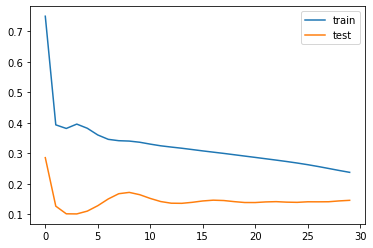

In [603]:
# design network
model = Sequential()
model.add(GRU(100, input_shape=(X_trainsc.shape[1], X_trainsc.shape[2])))
#model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())
# fit network
history = model.fit(X_trainsc, y_train, epochs=30, batch_size=1000, validation_data=(X_testsc, y_test), verbose=2, shuffle=False, class_weight=weights)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [604]:
y_pred = model.predict_classes(X_testsc)
print(np.unique(y_pred))
confusion_matrix(y_test, y_pred)

[0 1]


array([[1515,   22],
       [  29,    0]], dtype=int64)

In [605]:
y_pred = model.predict_classes(X_trainsc)
print(np.unique(y_pred))
confusion_matrix(y_train, y_pred)

[0 1]


array([[3546,   65],
       [  32,   10]], dtype=int64)

# RNN

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               18900     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 19,001
Trainable params: 19,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
4/4 - 1s - loss: 0.5376 - val_loss: 0.1320
Epoch 2/30
4/4 - 0s - loss: 0.3845 - val_loss: 0.1040
Epoch 3/30
4/4 - 0s - loss: 0.3844 - val_loss: 0.1178
Epoch 4/30
4/4 - 0s - loss: 0.3582 - val_loss: 0.1590
Epoch 5/30
4/4 - 0s - loss: 0.3517 - val_loss: 0.1824
Epoch 6/30
4/4 - 0s - loss: 0.3457 - val_loss: 0.1570
Epoch 7/30
4/4 - 0s - loss: 0.3328 - val_loss: 0.1336
Epoch 8/30
4/4 - 0s - loss: 0.3257 - val_loss: 0.1312
Epoch 9/30
4/4 - 0s - loss: 0.3169 - val_loss: 0.1432
Epoch 10/30
4/4 - 0s

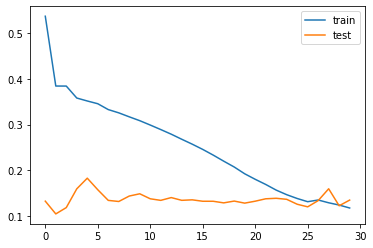

In [606]:
# design network
model = Sequential()
model.add(SimpleRNN(100, input_shape=(X_trainsc.shape[1], X_trainsc.shape[2])))
#model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())
# fit network
history = model.fit(X_trainsc, y_train, epochs=30, batch_size=1000, validation_data=(X_testsc, y_test), verbose=2, shuffle=False, class_weight=weights)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [607]:
y_pred = model.predict_classes(X_testsc)
print(np.unique(y_pred))
confusion_matrix(y_test, y_pred)

[0 1]


array([[1504,   33],
       [  29,    0]], dtype=int64)